In [1]:
# Multi Layer Perceptron with Gradient Boosting Feature Selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\gb_train_data_2.csv")

In [4]:
damage_labels = [1, 2, 3]

In [5]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [6]:
print(min_count)

25124


In [7]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [8]:
train_data.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,damage_grade
56040,3,720,4,5,u,x,v,s,0,0,0,0,1
7084,13,557,2,0,r,n,f,q,0,1,0,0,1
169873,26,39,1,30,r,n,v,j,0,0,0,0,1
117831,26,1085,2,5,r,n,f,q,0,1,0,0,1
146339,13,730,1,45,r,n,x,j,0,1,0,0,1


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])

In [11]:
train_data.head()

,geo_level_1_id,geo_level_2_id,count_floors_pre_eq,age,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_mud_mortar_brick,damage_grade
56040,3,720,4,5,3,2,2,2,0,0,0,0,1
7084,13,557,2,0,2,0,0,1,0,1,0,0,1
169873,26,39,1,30,2,0,2,0,0,0,0,0,1
117831,26,1085,2,5,2,0,0,1,0,1,0,0,1
146339,13,730,1,45,2,0,3,0,0,1,0,0,1


In [12]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,12].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [14]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8804 - accuracy: 0.5784 - val_loss: 0.8509 - val_accuracy: 0.5929
Epoch 2/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.8239 - accuracy: 0.6034 - val_loss: 0.8043 - val_accuracy: 0.6104
Epoch 3/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7869 - accuracy: 0.6229 - val_loss: 0.7806 - val_accuracy: 0.6277
Epoch 4/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7727 - accuracy: 0.6305 - val_loss: 0.7725 - val_accuracy: 0.6344
Epoch 5/10
1885/1885 [==============================] - 2s 1ms/step - loss: 0.7665 - accuracy: 0.6341 - val_loss: 0.7666 - val_accuracy: 0.6375
Epoch 6/10
1885/1885 [==============================] - 3s 2ms/step - loss: 0.7625 - accuracy: 0.6365 - val_loss: 0.7693 - val_accuracy: 0.6375
Epoch 7/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.7583 - accuracy: 0.6395 - val_loss: 0.7729 - val_accuracy:

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

472/472 [==============================] - 0s 803us/step - loss: 0.7608 - accuracy: 0.6405
Test accuracy: 0.6404643654823303


In [18]:
y_pred = model.predict(X_test)

472/472 [==============================] - 0s 773us/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.75      0.76      0.76      4993
           2       0.51      0.49      0.50      4960
           3       0.65      0.66      0.66      5122

    accuracy                           0.64     15075
   macro avg       0.64      0.64      0.64     15075
weighted avg       0.64      0.64      0.64     15075



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


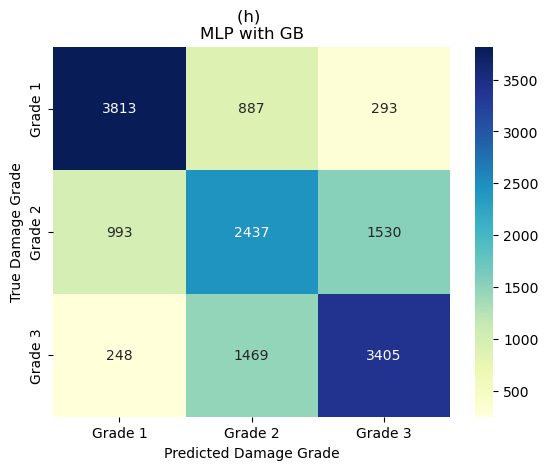

In [22]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("MLP Prediction Matrix")
plt.title("(h) \nMLP with GB")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()